# TEA SALES REGRESSION 🍵 



### 1. Problem Definition
To analyse the temporal nature of tea prices in the training dataset and forecast the weekly average tea price for the 29 weeks mentioned in the test set.

### 2. Dataset
Data is taken from MachineHack Competition - https://machinehack.com/hackathons/teastory_weekend_hackathon_edition_2_the_last_hacker_standing/overview

Train.csv — 544 rows x 15 columns (includes ‘Average’ as a target variable)

Test.csv — 29 rows x 15 columns

### 3. Evaluation
The submission will be evaluated using the RMSE metric. One can use One can use ‘np. sqrt (Mean Squared Error)’ to calculate the same.

### 4. Features
‘WeekEnding_Date’;“Average Prices across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati”; and Ref_Price across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati.”

Target Variable:  Average

### Getting our Data Ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data is in datetime format so we have to parse it 
data = pd.read_csv('train.csv',parse_dates=['WeekEnding_Date'])

In [3]:
data.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2009-03-01,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,2009-10-01,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   WeekEnding_Date           544 non-null    datetime64[ns]
 1   Kolkata_Average_Price     544 non-null    object        
 2   Kolkata_Ref_Price         542 non-null    object        
 3   Bangalore_Average_Price   544 non-null    object        
 4   Bangalore_Ref_Price       542 non-null    object        
 5   Cochin_Average_Price      544 non-null    object        
 6   Cochin_Ref_Price          541 non-null    object        
 7   Darjeeling_Average_Price  544 non-null    object        
 8   Darjeeling_Ref_Price      542 non-null    object        
 9   Ernakulam_Average_Price   544 non-null    object        
 10  Ernakulam_Ref_Price       543 non-null    object        
 11  Siliguri_Average_Price    543 non-null    object        
 12  Siliguri_Ref_Price    

In [5]:
data.isnull().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           2
Bangalore_Average_Price     0
Bangalore_Ref_Price         2
Cochin_Average_Price        0
Cochin_Ref_Price            3
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        2
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         1
Siliguri_Average_Price      1
Siliguri_Ref_Price          1
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

In [6]:
data.dtypes

WeekEnding_Date             datetime64[ns]
Kolkata_Average_Price               object
Kolkata_Ref_Price                   object
Bangalore_Average_Price             object
Bangalore_Ref_Price                 object
Cochin_Average_Price                object
Cochin_Ref_Price                    object
Darjeeling_Average_Price            object
Darjeeling_Ref_Price                object
Ernakulam_Average_Price             object
Ernakulam_Ref_Price                 object
Siliguri_Average_Price              object
Siliguri_Ref_Price                  object
Guwahati_Average_Price              object
Guwahati_Ref_Price                  object
Average                            float64
dtype: object

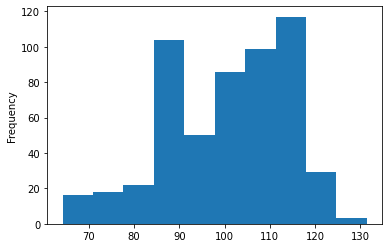

In [7]:
#let's plot hist of average
data.Average.plot.hist();

In [8]:
data.sort_values(by=['WeekEnding_Date'],inplace=True,ascending=True)

In [9]:
data.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
30,2009-01-08,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
17,2009-02-05,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429


### Copying the data

In [10]:
data_temp = data.copy()

In [11]:
data_temp.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
30,2009-01-08,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
17,2009-02-05,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429


In [12]:
data_temp['SaleDate'] = data_temp['WeekEnding_Date'].dt.day
data_temp['SaleMonth'] = data_temp['WeekEnding_Date'].dt.month
data_temp['SaleYear'] = data_temp['WeekEnding_Date'].dt.year

In [13]:
data_temp.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average,SaleDate,SaleMonth,SaleYear
30,2009-01-08,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692,8,1,2009
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000,17,1,2009
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667,24,1,2009
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923,31,1,2009
17,2009-02-05,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429,5,2,2009


In [14]:
data_temp.drop('WeekEnding_Date',axis=1,inplace=True)

In [15]:
data_temp.head()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average,SaleDate,SaleMonth,SaleYear
30,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692,8,1,2009
2,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000,17,1,2009
3,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667,24,1,2009
4,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923,31,1,2009
17,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429,5,2,2009


In [16]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 30 to 522
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kolkata_Average_Price     544 non-null    object 
 1   Kolkata_Ref_Price         542 non-null    object 
 2   Bangalore_Average_Price   544 non-null    object 
 3   Bangalore_Ref_Price       542 non-null    object 
 4   Cochin_Average_Price      544 non-null    object 
 5   Cochin_Ref_Price          541 non-null    object 
 6   Darjeeling_Average_Price  544 non-null    object 
 7   Darjeeling_Ref_Price      542 non-null    object 
 8   Ernakulam_Average_Price   544 non-null    object 
 9   Ernakulam_Ref_Price       543 non-null    object 
 10  Siliguri_Average_Price    543 non-null    object 
 11  Siliguri_Ref_Price        543 non-null    object 
 12  Guwahati_Average_Price    544 non-null    object 
 13  Guwahati_Ref_Price        544 non-null    object 
 14  Average  

As we can see we have also got N.S i.e, not sold so we cant just replace this with 0 

In [17]:
data["Bangalore_Average_Price"] = data["Bangalore_Average_Price"].apply(lambda x: x.replace("N.S", '0'))

In [18]:
data.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
30,2009-01-08,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,0.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
17,2009-02-05,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429


Now let's do this for all columns

In [19]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        unique = data_temp[label].unique()
        print(f'Unique values {label}:{unique}')

Unique values Kolkata_Average_Price:['120.93' '95.95' '94.14' '91.45' '126.49' '87.95' '84.39' '79.92' '99.01'
 'N.S' 'No Sale' '76.82' 'N.S.' '81.02' '128.69' '117.93' '122.13'
 '126.73' '137.33' '139.96' '140' '134.8' '130.55' '130.7' '130.26'
 '88.99' '79.54' '129.75' '124.59' '120.67' '122.81' '123.83' '126.2'
 '123.21' '133.97' '124.18' '129.7' '97.74' '129.8' '130.14' '128.85'
 '132.56' '127.35' '129.38' '132.46' '126.24' '121.4' '123.65' '122.95'
 '122.39' '113.96' '106.12' '110.32' '115.98' '131.81' '106.23' '95.47'
 '67.64' '128.06' '75.96' '135.83' '128.61' '106.8' '109.42' '115.92'
 '120.5' '120.76' '123' '105.73' '83.13' '132.73' '117.92' '124.76'
 '131.96' '129.25' '131.27' '137.58' '120.27' '135.72' '135.1' '136.17'
 '109' '135.56' '133.45' '133.27' '74.98' '131.57' '133.76' '133.73'
 '135.37' '127.22' '131.62' '130.93' '131.63' '119.26' '125.06' '122.91'
 '119.16' '129.41' '114.48' '113.17' '111.39' '71.64' '136.51' '97.43'
 '91.23' '126.5' '127.4' '125.08' '130.49' '112

### Replacing String values with 0

In [20]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = data_temp[label].str.replace('N.S','0')

In [21]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = data_temp[label].str.replace('No Sale','0')

In [22]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = data_temp[label].str.replace('NS','0')

In [23]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = data_temp[label].str.replace('N. S.','0')

In [24]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = data_temp[label].str.replace('No sale','0')

### Turning non-numerical values into float

In [25]:
for label,content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = content.astype('float')

In [26]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 30 to 522
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kolkata_Average_Price     544 non-null    float64
 1   Kolkata_Ref_Price         542 non-null    float64
 2   Bangalore_Average_Price   544 non-null    float64
 3   Bangalore_Ref_Price       542 non-null    float64
 4   Cochin_Average_Price      544 non-null    float64
 5   Cochin_Ref_Price          541 non-null    float64
 6   Darjeeling_Average_Price  544 non-null    float64
 7   Darjeeling_Ref_Price      542 non-null    float64
 8   Ernakulam_Average_Price   544 non-null    float64
 9   Ernakulam_Ref_Price       543 non-null    float64
 10  Siliguri_Average_Price    543 non-null    float64
 11  Siliguri_Ref_Price        543 non-null    float64
 12  Guwahati_Average_Price    544 non-null    float64
 13  Guwahati_Ref_Price        544 non-null    float64
 14  Average  

### Filling missing Values

In [27]:
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_temp[label] = content.fillna(content.median())
            

In [28]:
data_temp.isnull().sum()

Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
SaleDate                    0
SaleMonth                   0
SaleYear                    0
dtype: int64

In [29]:
data_temp.dtypes

Kolkata_Average_Price       float64
Kolkata_Ref_Price           float64
Bangalore_Average_Price     float64
Bangalore_Ref_Price         float64
Cochin_Average_Price        float64
Cochin_Ref_Price            float64
Darjeeling_Average_Price    float64
Darjeeling_Ref_Price        float64
Ernakulam_Average_Price     float64
Ernakulam_Ref_Price         float64
Siliguri_Average_Price      float64
Siliguri_Ref_Price          float64
Guwahati_Average_Price      float64
Guwahati_Ref_Price          float64
Average                     float64
SaleDate                      int64
SaleMonth                     int64
SaleYear                      int64
dtype: object

After successfully preprocesing the test data, we can now move onto modeling

### Saving the Cleaned data

In [30]:
data_temp.to_csv('cleaned_train.csv')

### Modeling

In [39]:
! pip3 install xgboost

ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\6\\anaconda3\\Lib\\site-packages\\xgboost\\core.py'
Consider using the `--user` option or check the permissions.



  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [41]:
! pip3 install catboost

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [50]:
#let's get our X and y variable

np.random.seed(42)

X = data_temp.drop('Average',axis=1)
y = data_temp.Average

#let's split our test and validation set
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=42)


In [51]:
len(X_train), len(X_val), len(y_train), len(y_val)

(502, 42, 502, 42)

In [52]:
#let's take our baseline model our ready
models = {
    'RandomForest':RandomForestRegressor(),
    'XGB':XGBRegressor(),
    'CatBoost':CatBoostRegressor()
}

In [62]:
#RMSE metric
def rmse(y_true,y_preds):
    return np.sqrt(mean_squared_error(y_true,y_preds))

In [73]:
def fit_score(model,X_train,X_valid,y_train,y_valid):
    for label,model in models.items():
        np.random.seed(42)
        
        #fitting the model
        model.fit(X_train,y_train)
        
        #predicting on validation and training set
        prediction_train = model.predict(X_train)
        prediction_valid = model.predict(X_val)
        
        #MAE on training set and validation set
        MAE_train = mean_absolute_error(y_train,prediction_train)
        print(f'MAE_train {model} = {MAE_train}')
        MAE_valid = mean_absolute_error(y_valid,prediction_valid)
        print(f'MAE_valid:{model} = {MAE_valid}')
        
        #RMSE on training and validation set
        RMSE_train = rmse(y_train,prediction_train)
        print(f'RMSE_train {model} = {RMSE_train}')
        RMSE_valid = rmse(y_valid,prediction_valid)
        print(f'RMSE_valid:{model} = {RMSE_valid}')
        
        

In [74]:
fit_score(
    model = models,
    X_train = X_train,
    X_valid = X_val,
    y_train = y_train,
    y_valid = y_val
)

MAE_train RandomForestRegressor() = 0.6232736369444224
MAE_valid:RandomForestRegressor() = 1.6759844241618982
RMSE_train RandomForestRegressor() = 1.128277991253201
RMSE_valid:RandomForestRegressor() = 3.631431948848331
MAE_train XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) = 0.008963821667354564
MAE_valid:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importanc

110:	learn: 2.0008365	total: 216ms	remaining: 1.73s
111:	learn: 1.9809881	total: 218ms	remaining: 1.73s
112:	learn: 1.9636232	total: 220ms	remaining: 1.73s
113:	learn: 1.9467159	total: 222ms	remaining: 1.72s
114:	learn: 1.9292377	total: 224ms	remaining: 1.72s
115:	learn: 1.9122004	total: 226ms	remaining: 1.72s
116:	learn: 1.8978284	total: 227ms	remaining: 1.72s
117:	learn: 1.8800361	total: 229ms	remaining: 1.71s
118:	learn: 1.8634201	total: 231ms	remaining: 1.71s
119:	learn: 1.8465809	total: 233ms	remaining: 1.71s
120:	learn: 1.8305722	total: 235ms	remaining: 1.7s
121:	learn: 1.8143478	total: 236ms	remaining: 1.7s
122:	learn: 1.8001341	total: 238ms	remaining: 1.7s
123:	learn: 1.7846663	total: 240ms	remaining: 1.7s
124:	learn: 1.7714844	total: 242ms	remaining: 1.69s
125:	learn: 1.7567522	total: 244ms	remaining: 1.69s
126:	learn: 1.7439873	total: 246ms	remaining: 1.69s
127:	learn: 1.7301969	total: 248ms	remaining: 1.69s
128:	learn: 1.7191493	total: 250ms	remaining: 1.69s
129:	learn: 1.70

295:	learn: 0.8575815	total: 565ms	remaining: 1.34s
296:	learn: 0.8543992	total: 567ms	remaining: 1.34s
297:	learn: 0.8509889	total: 569ms	remaining: 1.34s
298:	learn: 0.8473015	total: 570ms	remaining: 1.34s
299:	learn: 0.8456316	total: 573ms	remaining: 1.33s
300:	learn: 0.8422488	total: 575ms	remaining: 1.33s
301:	learn: 0.8382984	total: 577ms	remaining: 1.33s
302:	learn: 0.8350763	total: 579ms	remaining: 1.33s
303:	learn: 0.8310096	total: 580ms	remaining: 1.33s
304:	learn: 0.8299826	total: 582ms	remaining: 1.33s
305:	learn: 0.8266754	total: 584ms	remaining: 1.32s
306:	learn: 0.8258197	total: 585ms	remaining: 1.32s
307:	learn: 0.8231287	total: 587ms	remaining: 1.32s
308:	learn: 0.8207649	total: 589ms	remaining: 1.32s
309:	learn: 0.8179569	total: 591ms	remaining: 1.31s
310:	learn: 0.8143308	total: 593ms	remaining: 1.31s
311:	learn: 0.8103894	total: 594ms	remaining: 1.31s
312:	learn: 0.8073180	total: 596ms	remaining: 1.31s
313:	learn: 0.8063603	total: 598ms	remaining: 1.31s
314:	learn: 

491:	learn: 0.4978192	total: 913ms	remaining: 943ms
492:	learn: 0.4964238	total: 915ms	remaining: 941ms
493:	learn: 0.4952832	total: 917ms	remaining: 940ms
494:	learn: 0.4951489	total: 919ms	remaining: 938ms
495:	learn: 0.4942309	total: 921ms	remaining: 936ms
496:	learn: 0.4927853	total: 924ms	remaining: 935ms
497:	learn: 0.4912192	total: 925ms	remaining: 933ms
498:	learn: 0.4906324	total: 927ms	remaining: 931ms
499:	learn: 0.4905259	total: 929ms	remaining: 929ms
500:	learn: 0.4893743	total: 931ms	remaining: 927ms
501:	learn: 0.4879114	total: 932ms	remaining: 925ms
502:	learn: 0.4869120	total: 934ms	remaining: 923ms
503:	learn: 0.4854610	total: 936ms	remaining: 921ms
504:	learn: 0.4840552	total: 938ms	remaining: 919ms
505:	learn: 0.4834361	total: 939ms	remaining: 917ms
506:	learn: 0.4828664	total: 941ms	remaining: 915ms
507:	learn: 0.4820292	total: 943ms	remaining: 913ms
508:	learn: 0.4808058	total: 945ms	remaining: 911ms
509:	learn: 0.4792805	total: 946ms	remaining: 909ms
510:	learn: 

675:	learn: 0.3218227	total: 1.26s	remaining: 604ms
676:	learn: 0.3210615	total: 1.26s	remaining: 603ms
677:	learn: 0.3202880	total: 1.26s	remaining: 601ms
678:	learn: 0.3197091	total: 1.27s	remaining: 599ms
679:	learn: 0.3189379	total: 1.27s	remaining: 597ms
680:	learn: 0.3184034	total: 1.27s	remaining: 595ms
681:	learn: 0.3177352	total: 1.27s	remaining: 593ms
682:	learn: 0.3170940	total: 1.27s	remaining: 591ms
683:	learn: 0.3161323	total: 1.28s	remaining: 590ms
684:	learn: 0.3154676	total: 1.28s	remaining: 588ms
685:	learn: 0.3147324	total: 1.28s	remaining: 586ms
686:	learn: 0.3140487	total: 1.28s	remaining: 584ms
687:	learn: 0.3129804	total: 1.28s	remaining: 582ms
688:	learn: 0.3123080	total: 1.28s	remaining: 580ms
689:	learn: 0.3122632	total: 1.29s	remaining: 578ms
690:	learn: 0.3113675	total: 1.29s	remaining: 577ms
691:	learn: 0.3106082	total: 1.29s	remaining: 575ms
692:	learn: 0.3096785	total: 1.29s	remaining: 573ms
693:	learn: 0.3094228	total: 1.29s	remaining: 571ms
694:	learn: 

862:	learn: 0.2225406	total: 1.61s	remaining: 255ms
863:	learn: 0.2223740	total: 1.61s	remaining: 254ms
864:	learn: 0.2218900	total: 1.61s	remaining: 252ms
865:	learn: 0.2215040	total: 1.61s	remaining: 250ms
866:	learn: 0.2210694	total: 1.62s	remaining: 248ms
867:	learn: 0.2205848	total: 1.62s	remaining: 246ms
868:	learn: 0.2201944	total: 1.62s	remaining: 244ms
869:	learn: 0.2199486	total: 1.62s	remaining: 242ms
870:	learn: 0.2194823	total: 1.62s	remaining: 241ms
871:	learn: 0.2191184	total: 1.63s	remaining: 239ms
872:	learn: 0.2185431	total: 1.63s	remaining: 237ms
873:	learn: 0.2181782	total: 1.63s	remaining: 235ms
874:	learn: 0.2176759	total: 1.63s	remaining: 233ms
875:	learn: 0.2172117	total: 1.63s	remaining: 231ms
876:	learn: 0.2167372	total: 1.63s	remaining: 229ms
877:	learn: 0.2161755	total: 1.64s	remaining: 227ms
878:	learn: 0.2157602	total: 1.64s	remaining: 226ms
879:	learn: 0.2150780	total: 1.64s	remaining: 224ms
880:	learn: 0.2144626	total: 1.64s	remaining: 222ms
881:	learn: 

so we can see that all our 3 models are quite performing well with RMSE of 3(rounded), but if we compare all 3 models we can see that **CatBoost** perform quite well 

So we will hypertune our CatBoost model

In [75]:
baseline_model = CatBoostRegressor()

## Hypertuning our model with RandomizedSearchCV

In [76]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]}

In [77]:
%%time
rs_cb = RandomizedSearchCV(
            CatBoostRegressor(),
            param_distributions=parameters,
            cv=5,
            n_iter=10,
            verbose=False,
            random_state=42
)

rs_cb.fit(X_train,y_train)

0:	learn: 13.6116515	total: 30.9ms	remaining: 2.75s
1:	learn: 13.4202681	total: 31.7ms	remaining: 1.39s
2:	learn: 13.2334624	total: 32.4ms	remaining: 939ms
3:	learn: 13.0244296	total: 33.1ms	remaining: 711ms
4:	learn: 12.8350592	total: 33.8ms	remaining: 574ms
5:	learn: 12.6606024	total: 34.5ms	remaining: 483ms
6:	learn: 12.4864019	total: 35.2ms	remaining: 418ms
7:	learn: 12.3188703	total: 36ms	remaining: 369ms
8:	learn: 12.1462210	total: 36.6ms	remaining: 330ms
9:	learn: 11.9791411	total: 37.3ms	remaining: 298ms
10:	learn: 11.7985361	total: 37.9ms	remaining: 272ms
11:	learn: 11.6441259	total: 38.5ms	remaining: 250ms
12:	learn: 11.4821532	total: 39.1ms	remaining: 232ms
13:	learn: 11.3307583	total: 39.8ms	remaining: 216ms
14:	learn: 11.1898153	total: 40.4ms	remaining: 202ms
15:	learn: 11.0358412	total: 41ms	remaining: 190ms
16:	learn: 10.8821552	total: 41.6ms	remaining: 179ms
17:	learn: 10.7420700	total: 42.2ms	remaining: 169ms
18:	learn: 10.5945685	total: 42.8ms	remaining: 160ms
19:	lea

0:	learn: 13.3927098	total: 10.3ms	remaining: 918ms
1:	learn: 13.1975193	total: 11ms	remaining: 484ms
2:	learn: 13.0272569	total: 11.7ms	remaining: 339ms
3:	learn: 12.8355409	total: 12.4ms	remaining: 266ms
4:	learn: 12.6512346	total: 13ms	remaining: 220ms
5:	learn: 12.4860650	total: 13.6ms	remaining: 190ms
6:	learn: 12.3376228	total: 14.2ms	remaining: 168ms
7:	learn: 12.1788912	total: 14.8ms	remaining: 151ms
8:	learn: 12.0121230	total: 15.5ms	remaining: 140ms
9:	learn: 11.8484747	total: 16.2ms	remaining: 130ms
10:	learn: 11.6858220	total: 16.9ms	remaining: 122ms
11:	learn: 11.5355332	total: 17.5ms	remaining: 114ms
12:	learn: 11.3782833	total: 18.2ms	remaining: 108ms
13:	learn: 11.2324444	total: 18.8ms	remaining: 102ms
14:	learn: 11.0983366	total: 19.5ms	remaining: 97.3ms
15:	learn: 10.9386050	total: 20ms	remaining: 92.7ms
16:	learn: 10.8000410	total: 20.8ms	remaining: 89.2ms
17:	learn: 10.6790514	total: 21.5ms	remaining: 86.2ms
18:	learn: 10.5303017	total: 22.3ms	remaining: 83.3ms
19:	

0:	learn: 13.6089483	total: 1.05ms	remaining: 93.8ms
1:	learn: 13.4190956	total: 1.98ms	remaining: 87.3ms
2:	learn: 13.2357832	total: 2.7ms	remaining: 78.4ms
3:	learn: 13.0384118	total: 3.43ms	remaining: 73.7ms
4:	learn: 12.8510806	total: 4.2ms	remaining: 71.3ms
5:	learn: 12.6829388	total: 5.04ms	remaining: 70.5ms
6:	learn: 12.5104271	total: 5.87ms	remaining: 69.7ms
7:	learn: 12.3442652	total: 6.71ms	remaining: 68.7ms
8:	learn: 12.1736824	total: 7.43ms	remaining: 66.9ms
9:	learn: 12.0096371	total: 8.26ms	remaining: 66ms
10:	learn: 11.8335042	total: 9.05ms	remaining: 65ms
11:	learn: 11.6843813	total: 9.96ms	remaining: 64.7ms
12:	learn: 11.5368387	total: 10.9ms	remaining: 64.4ms
13:	learn: 11.3923760	total: 11.6ms	remaining: 63.2ms
14:	learn: 11.2545275	total: 12.3ms	remaining: 61.6ms
15:	learn: 11.1012158	total: 13ms	remaining: 60.1ms
16:	learn: 10.9449091	total: 13.6ms	remaining: 58.6ms
17:	learn: 10.8088880	total: 14.3ms	remaining: 57.1ms
18:	learn: 10.6597003	total: 14.9ms	remaining:

0:	learn: 13.0899974	total: 13.2ms	remaining: 1.04s
1:	learn: 12.9988717	total: 15.2ms	remaining: 593ms
2:	learn: 12.8997665	total: 17.3ms	remaining: 443ms
3:	learn: 12.8111021	total: 19.1ms	remaining: 364ms
4:	learn: 12.7190576	total: 21.1ms	remaining: 316ms
5:	learn: 12.6298434	total: 23ms	remaining: 283ms
6:	learn: 12.5395140	total: 24.9ms	remaining: 260ms
7:	learn: 12.4502392	total: 26.8ms	remaining: 241ms
8:	learn: 12.3608135	total: 28.7ms	remaining: 227ms
9:	learn: 12.2757642	total: 30.4ms	remaining: 213ms
10:	learn: 12.1834819	total: 32.1ms	remaining: 202ms
11:	learn: 12.0978015	total: 33.9ms	remaining: 192ms
12:	learn: 12.0113290	total: 35.5ms	remaining: 183ms
13:	learn: 11.9246271	total: 37.2ms	remaining: 175ms
14:	learn: 11.8389790	total: 38.9ms	remaining: 169ms
15:	learn: 11.7556555	total: 40.6ms	remaining: 162ms
16:	learn: 11.6761395	total: 43.8ms	remaining: 162ms
17:	learn: 11.5972230	total: 45.7ms	remaining: 157ms
18:	learn: 11.5153135	total: 47.6ms	remaining: 153ms
19:	l

0:	learn: 13.3315843	total: 2.22ms	remaining: 175ms
1:	learn: 13.2327439	total: 4.18ms	remaining: 163ms
2:	learn: 13.1339603	total: 6.12ms	remaining: 157ms
3:	learn: 13.0376159	total: 8.04ms	remaining: 153ms
4:	learn: 12.9424159	total: 9.94ms	remaining: 149ms
5:	learn: 12.8541494	total: 11.8ms	remaining: 146ms
6:	learn: 12.7624636	total: 13.8ms	remaining: 144ms
7:	learn: 12.6699973	total: 15.7ms	remaining: 141ms
8:	learn: 12.5755075	total: 17.5ms	remaining: 138ms
9:	learn: 12.4869975	total: 19.3ms	remaining: 135ms
10:	learn: 12.3943151	total: 21ms	remaining: 132ms
11:	learn: 12.3044047	total: 22.6ms	remaining: 128ms
12:	learn: 12.2157348	total: 24.3ms	remaining: 125ms
13:	learn: 12.1269276	total: 26ms	remaining: 122ms
14:	learn: 12.0385152	total: 27.8ms	remaining: 120ms
15:	learn: 11.9501231	total: 29.5ms	remaining: 118ms
16:	learn: 11.8673408	total: 31.4ms	remaining: 116ms
17:	learn: 11.7838483	total: 33.1ms	remaining: 114ms
18:	learn: 11.6963164	total: 34.9ms	remaining: 112ms
19:	lea

0:	learn: 13.7204642	total: 35.4ms	remaining: 319ms
1:	learn: 13.6341265	total: 69ms	remaining: 276ms
2:	learn: 13.5410025	total: 103ms	remaining: 241ms
3:	learn: 13.4566081	total: 139ms	remaining: 209ms
4:	learn: 13.3678367	total: 175ms	remaining: 175ms
5:	learn: 13.2745157	total: 212ms	remaining: 141ms
6:	learn: 13.1850441	total: 249ms	remaining: 107ms
7:	learn: 13.0942864	total: 287ms	remaining: 71.6ms
8:	learn: 13.0131101	total: 322ms	remaining: 35.7ms
9:	learn: 12.9264356	total: 358ms	remaining: 0us
0:	learn: 13.0957916	total: 39.7ms	remaining: 358ms
1:	learn: 13.0129389	total: 73.3ms	remaining: 293ms
2:	learn: 12.9226425	total: 105ms	remaining: 246ms
3:	learn: 12.8474000	total: 141ms	remaining: 212ms
4:	learn: 12.7626620	total: 177ms	remaining: 177ms
5:	learn: 12.6765210	total: 213ms	remaining: 142ms
6:	learn: 12.5942361	total: 248ms	remaining: 106ms
7:	learn: 12.5156326	total: 286ms	remaining: 71.4ms
8:	learn: 12.4439675	total: 322ms	remaining: 35.7ms
9:	learn: 12.3666741	total:

12:	learn: 9.6354833	total: 442ms	remaining: 1.26s
13:	learn: 9.4095705	total: 479ms	remaining: 1.23s
14:	learn: 9.1797023	total: 515ms	remaining: 1.2s
15:	learn: 8.9646276	total: 552ms	remaining: 1.17s
16:	learn: 8.7777455	total: 588ms	remaining: 1.14s
17:	learn: 8.5936876	total: 622ms	remaining: 1.11s
18:	learn: 8.3728935	total: 662ms	remaining: 1.08s
19:	learn: 8.1759049	total: 700ms	remaining: 1.05s
20:	learn: 7.9895701	total: 736ms	remaining: 1.02s
21:	learn: 7.8034759	total: 771ms	remaining: 982ms
22:	learn: 7.6476140	total: 808ms	remaining: 949ms
23:	learn: 7.4628053	total: 844ms	remaining: 914ms
24:	learn: 7.2828540	total: 881ms	remaining: 881ms
25:	learn: 7.1317154	total: 917ms	remaining: 846ms
26:	learn: 6.9525276	total: 919ms	remaining: 783ms
27:	learn: 6.7925407	total: 954ms	remaining: 750ms
28:	learn: 6.6404833	total: 990ms	remaining: 717ms
29:	learn: 6.4855357	total: 1.02s	remaining: 684ms
30:	learn: 6.3311372	total: 1.06s	remaining: 651ms
31:	learn: 6.1916426	total: 1.1s

55:	learn: 4.7905918	total: 175ms	remaining: 106ms
56:	learn: 4.7159028	total: 178ms	remaining: 103ms
57:	learn: 4.6362673	total: 182ms	remaining: 100ms
58:	learn: 4.5643199	total: 185ms	remaining: 97.3ms
59:	learn: 4.4917299	total: 188ms	remaining: 94.2ms
60:	learn: 4.4297304	total: 192ms	remaining: 91.1ms
61:	learn: 4.3610348	total: 195ms	remaining: 87.9ms
62:	learn: 4.2938048	total: 198ms	remaining: 84.8ms
63:	learn: 4.2259456	total: 201ms	remaining: 81.5ms
64:	learn: 4.1752918	total: 204ms	remaining: 78.4ms
65:	learn: 4.1194414	total: 207ms	remaining: 75.2ms
66:	learn: 4.0623797	total: 210ms	remaining: 72ms
67:	learn: 4.0072396	total: 213ms	remaining: 68.9ms
68:	learn: 3.9556268	total: 216ms	remaining: 65.7ms
69:	learn: 3.8972452	total: 219ms	remaining: 62.6ms
70:	learn: 3.8403148	total: 222ms	remaining: 59.4ms
71:	learn: 3.7916723	total: 225ms	remaining: 56.3ms
72:	learn: 3.7333195	total: 228ms	remaining: 53.2ms
73:	learn: 3.6748683	total: 231ms	remaining: 50ms
74:	learn: 3.627997

54:	learn: 4.9312515	total: 193ms	remaining: 123ms
55:	learn: 4.8558149	total: 196ms	remaining: 119ms
56:	learn: 4.7861129	total: 199ms	remaining: 115ms
57:	learn: 4.7120100	total: 203ms	remaining: 112ms
58:	learn: 4.6399315	total: 206ms	remaining: 108ms
59:	learn: 4.5676535	total: 210ms	remaining: 105ms
60:	learn: 4.5006905	total: 213ms	remaining: 101ms
61:	learn: 4.4280579	total: 216ms	remaining: 97.7ms
62:	learn: 4.3646676	total: 219ms	remaining: 94.1ms
63:	learn: 4.2997049	total: 222ms	remaining: 90.4ms
64:	learn: 4.2384702	total: 225ms	remaining: 86.7ms
65:	learn: 4.1832371	total: 228ms	remaining: 83.1ms
66:	learn: 4.1259613	total: 232ms	remaining: 79.5ms
67:	learn: 4.0726342	total: 235ms	remaining: 75.9ms
68:	learn: 4.0189032	total: 238ms	remaining: 72.4ms
69:	learn: 3.9691812	total: 241ms	remaining: 68.8ms
70:	learn: 3.9120423	total: 244ms	remaining: 65.2ms
71:	learn: 3.8627554	total: 247ms	remaining: 61.7ms
72:	learn: 3.8089624	total: 250ms	remaining: 58.2ms
73:	learn: 3.756220

57:	learn: 4.6334925	total: 188ms	remaining: 104ms
58:	learn: 4.5608236	total: 192ms	remaining: 101ms
59:	learn: 4.4860514	total: 195ms	remaining: 97.5ms
60:	learn: 4.4236729	total: 198ms	remaining: 94.3ms
61:	learn: 4.3527758	total: 202ms	remaining: 91.1ms
62:	learn: 4.2903727	total: 205ms	remaining: 88ms
63:	learn: 4.2226507	total: 209ms	remaining: 84.7ms
64:	learn: 4.1596457	total: 212ms	remaining: 81.4ms
65:	learn: 4.0952113	total: 215ms	remaining: 78.1ms
66:	learn: 4.0405364	total: 218ms	remaining: 74.8ms
67:	learn: 3.9804103	total: 221ms	remaining: 71.5ms
68:	learn: 3.9198874	total: 224ms	remaining: 68.2ms
69:	learn: 3.8625178	total: 227ms	remaining: 65ms
70:	learn: 3.8025751	total: 230ms	remaining: 61.7ms
71:	learn: 3.7525622	total: 234ms	remaining: 58.4ms
72:	learn: 3.6953648	total: 237ms	remaining: 55.1ms
73:	learn: 3.6404297	total: 240ms	remaining: 51.8ms
74:	learn: 3.5895716	total: 243ms	remaining: 48.5ms
75:	learn: 3.5437049	total: 246ms	remaining: 45.3ms
76:	learn: 3.49263

1:	learn: 13.2265770	total: 16.3ms	remaining: 555ms
2:	learn: 12.9509725	total: 20.4ms	remaining: 456ms
3:	learn: 12.6672916	total: 24.2ms	remaining: 399ms
4:	learn: 12.3904347	total: 27.5ms	remaining: 358ms
5:	learn: 12.1355938	total: 31.2ms	remaining: 333ms
6:	learn: 11.9080207	total: 34.4ms	remaining: 310ms
7:	learn: 11.6550924	total: 37.4ms	remaining: 290ms
8:	learn: 11.3955567	total: 40.4ms	remaining: 274ms
9:	learn: 11.1448239	total: 43.4ms	remaining: 260ms
10:	learn: 10.9167890	total: 46.6ms	remaining: 250ms
11:	learn: 10.6824554	total: 49.8ms	remaining: 240ms
12:	learn: 10.4645967	total: 52.8ms	remaining: 232ms
13:	learn: 10.2479001	total: 56.2ms	remaining: 225ms
14:	learn: 10.0423098	total: 60.4ms	remaining: 221ms
15:	learn: 9.8465801	total: 63.6ms	remaining: 215ms
16:	learn: 9.6602417	total: 66.8ms	remaining: 208ms
17:	learn: 9.4513271	total: 69.8ms	remaining: 202ms
18:	learn: 9.2722853	total: 72.9ms	remaining: 196ms
19:	learn: 9.0846249	total: 75.9ms	remaining: 190ms
20:	lea

58:	learn: 4.6399315	total: 188ms	remaining: 35ms
59:	learn: 4.5676535	total: 191ms	remaining: 31.8ms
60:	learn: 4.5006905	total: 194ms	remaining: 28.7ms
61:	learn: 4.4280579	total: 198ms	remaining: 25.5ms
62:	learn: 4.3646676	total: 201ms	remaining: 22.3ms
63:	learn: 4.2997049	total: 204ms	remaining: 19.1ms
64:	learn: 4.2384702	total: 207ms	remaining: 15.9ms
65:	learn: 4.1832371	total: 210ms	remaining: 12.7ms
66:	learn: 4.1259613	total: 213ms	remaining: 9.54ms
67:	learn: 4.0726342	total: 227ms	remaining: 6.68ms
68:	learn: 4.0189032	total: 230ms	remaining: 3.34ms
69:	learn: 3.9691812	total: 233ms	remaining: 0us
0:	learn: 13.1318934	total: 13ms	remaining: 899ms
1:	learn: 12.8412471	total: 16ms	remaining: 543ms
2:	learn: 12.5704615	total: 18.9ms	remaining: 422ms
3:	learn: 12.2996274	total: 21.9ms	remaining: 361ms
4:	learn: 12.0271369	total: 25.1ms	remaining: 327ms
5:	learn: 11.7742799	total: 28.3ms	remaining: 302ms
6:	learn: 11.5566483	total: 31.3ms	remaining: 282ms
7:	learn: 11.3164835	

0:	learn: 12.8376383	total: 23.3ms	remaining: 210ms
1:	learn: 12.4835261	total: 35ms	remaining: 140ms
2:	learn: 12.1834240	total: 46.2ms	remaining: 108ms
3:	learn: 11.8580697	total: 57.4ms	remaining: 86.1ms
4:	learn: 11.5558881	total: 68.8ms	remaining: 68.8ms
5:	learn: 11.2337393	total: 81.1ms	remaining: 54.1ms
6:	learn: 10.9285571	total: 94.4ms	remaining: 40.5ms
7:	learn: 10.6177607	total: 107ms	remaining: 26.7ms
8:	learn: 10.3526322	total: 119ms	remaining: 13.2ms
9:	learn: 10.0846985	total: 131ms	remaining: 0us
0:	learn: 13.2233661	total: 14.1ms	remaining: 127ms
1:	learn: 12.8442324	total: 28.1ms	remaining: 112ms
2:	learn: 12.5390760	total: 42.7ms	remaining: 99.7ms
3:	learn: 12.1675221	total: 58.3ms	remaining: 87.4ms
4:	learn: 11.8637435	total: 70.5ms	remaining: 70.5ms
5:	learn: 11.5285215	total: 82.9ms	remaining: 55.3ms
6:	learn: 11.2026409	total: 94.4ms	remaining: 40.5ms
7:	learn: 10.8893205	total: 106ms	remaining: 26.4ms
8:	learn: 10.6135837	total: 117ms	remaining: 13ms
9:	learn: 

56:	learn: 8.9687070	total: 185ms	remaining: 42.2ms
57:	learn: 8.9100703	total: 188ms	remaining: 39ms
58:	learn: 8.8488919	total: 192ms	remaining: 35.8ms
59:	learn: 8.7895443	total: 195ms	remaining: 32.5ms
60:	learn: 8.7304528	total: 198ms	remaining: 29.3ms
61:	learn: 8.6733042	total: 201ms	remaining: 26ms
62:	learn: 8.6223053	total: 204ms	remaining: 22.7ms
63:	learn: 8.5667882	total: 207ms	remaining: 19.4ms
64:	learn: 8.5082778	total: 210ms	remaining: 16.2ms
65:	learn: 8.4491684	total: 214ms	remaining: 12.9ms
66:	learn: 8.3957973	total: 217ms	remaining: 9.7ms
67:	learn: 8.3409195	total: 220ms	remaining: 6.46ms
68:	learn: 8.2912003	total: 223ms	remaining: 3.23ms
69:	learn: 8.2380465	total: 226ms	remaining: 0us
0:	learn: 13.4905790	total: 9.38ms	remaining: 647ms
1:	learn: 13.3928873	total: 13.3ms	remaining: 451ms
2:	learn: 13.3025450	total: 16.4ms	remaining: 367ms
3:	learn: 13.2051618	total: 20ms	remaining: 331ms
4:	learn: 13.1077508	total: 23.4ms	remaining: 304ms
5:	learn: 13.0150290	t

56:	learn: 9.3717409	total: 184ms	remaining: 42ms
57:	learn: 9.3086944	total: 187ms	remaining: 38.8ms
58:	learn: 9.2420066	total: 191ms	remaining: 35.5ms
59:	learn: 9.1787208	total: 194ms	remaining: 32.3ms
60:	learn: 9.1165250	total: 197ms	remaining: 29.1ms
61:	learn: 9.0544288	total: 201ms	remaining: 25.9ms
62:	learn: 9.0037898	total: 204ms	remaining: 22.6ms
63:	learn: 8.9440483	total: 207ms	remaining: 19.4ms
64:	learn: 8.8811746	total: 210ms	remaining: 16.2ms
65:	learn: 8.8237959	total: 213ms	remaining: 12.9ms
66:	learn: 8.7689789	total: 216ms	remaining: 9.69ms
67:	learn: 8.7089584	total: 219ms	remaining: 6.45ms
68:	learn: 8.6547784	total: 222ms	remaining: 3.22ms
69:	learn: 8.5979689	total: 226ms	remaining: 0us
0:	learn: 13.4275944	total: 3.92ms	remaining: 349ms
1:	learn: 13.0365360	total: 7.38ms	remaining: 325ms
2:	learn: 12.6758698	total: 10.7ms	remaining: 311ms
3:	learn: 12.2931254	total: 13.7ms	remaining: 295ms
4:	learn: 11.9370768	total: 17.1ms	remaining: 292ms
5:	learn: 11.6130

60:	learn: 3.2869426	total: 199ms	remaining: 94.4ms
61:	learn: 3.2318056	total: 202ms	remaining: 91.1ms
62:	learn: 3.1770512	total: 205ms	remaining: 87.9ms
63:	learn: 3.1169252	total: 208ms	remaining: 84.5ms
64:	learn: 3.0681279	total: 211ms	remaining: 81.2ms
65:	learn: 3.0264286	total: 214ms	remaining: 77.9ms
66:	learn: 2.9858301	total: 217ms	remaining: 74.7ms
67:	learn: 2.9406528	total: 221ms	remaining: 71.4ms
68:	learn: 2.8948220	total: 224ms	remaining: 68.1ms
69:	learn: 2.8506026	total: 227ms	remaining: 64.8ms
70:	learn: 2.8070160	total: 230ms	remaining: 61.5ms
71:	learn: 2.7665513	total: 233ms	remaining: 58.2ms
72:	learn: 2.7209426	total: 236ms	remaining: 54.9ms
73:	learn: 2.6848495	total: 239ms	remaining: 51.7ms
74:	learn: 2.6449897	total: 242ms	remaining: 48.4ms
75:	learn: 2.6066858	total: 246ms	remaining: 45.2ms
76:	learn: 2.5668744	total: 249ms	remaining: 42.1ms
77:	learn: 2.5287818	total: 253ms	remaining: 38.9ms
78:	learn: 2.4885923	total: 256ms	remaining: 35.6ms
79:	learn: 2

57:	learn: 3.4376822	total: 189ms	remaining: 104ms
58:	learn: 3.3819261	total: 192ms	remaining: 101ms
59:	learn: 3.3238684	total: 195ms	remaining: 97.6ms
60:	learn: 3.2685805	total: 199ms	remaining: 94.4ms
61:	learn: 3.2093034	total: 202ms	remaining: 91.1ms
62:	learn: 3.1543177	total: 205ms	remaining: 87.8ms
63:	learn: 3.1018930	total: 208ms	remaining: 84.5ms
64:	learn: 3.0558502	total: 211ms	remaining: 81.1ms
65:	learn: 3.0072745	total: 214ms	remaining: 77.9ms
66:	learn: 2.9605888	total: 217ms	remaining: 74.6ms
67:	learn: 2.9159657	total: 221ms	remaining: 71.3ms
68:	learn: 2.8695468	total: 224ms	remaining: 68.1ms
69:	learn: 2.8244443	total: 227ms	remaining: 64.7ms
70:	learn: 2.7798505	total: 230ms	remaining: 61.5ms
71:	learn: 2.7400475	total: 233ms	remaining: 58.2ms
72:	learn: 2.6942504	total: 236ms	remaining: 55ms
73:	learn: 2.6551621	total: 239ms	remaining: 51.8ms
74:	learn: 2.6167958	total: 243ms	remaining: 48.5ms
75:	learn: 2.5764410	total: 246ms	remaining: 45.3ms
76:	learn: 2.534

58:	learn: 3.3254876	total: 193ms	remaining: 101ms
59:	learn: 3.2688751	total: 197ms	remaining: 98.3ms
60:	learn: 3.2146074	total: 200ms	remaining: 95.1ms
61:	learn: 3.1562983	total: 203ms	remaining: 91.8ms
62:	learn: 3.1034296	total: 206ms	remaining: 88.4ms
63:	learn: 3.0556007	total: 210ms	remaining: 85.1ms
64:	learn: 3.0060744	total: 213ms	remaining: 81.8ms
65:	learn: 2.9570035	total: 216ms	remaining: 78.5ms
66:	learn: 2.9072994	total: 219ms	remaining: 75.2ms
67:	learn: 2.8663375	total: 222ms	remaining: 71.8ms
68:	learn: 2.8213061	total: 225ms	remaining: 68.5ms
69:	learn: 2.7765491	total: 228ms	remaining: 65.2ms
70:	learn: 2.7354712	total: 231ms	remaining: 61.9ms
71:	learn: 2.6998134	total: 234ms	remaining: 58.6ms
72:	learn: 2.6533500	total: 237ms	remaining: 55.3ms
73:	learn: 2.6162117	total: 241ms	remaining: 52ms
74:	learn: 2.5788271	total: 244ms	remaining: 48.7ms
75:	learn: 2.5363609	total: 247ms	remaining: 45.5ms
76:	learn: 2.5012092	total: 250ms	remaining: 42.2ms
77:	learn: 2.46

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000210460D89D0>,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   random_state=42, verbose=False)

In [78]:
rs_cb.best_params_

{'learning_rate': 0.04, 'iterations': 90, 'depth': 7}

In [79]:
rs_prediction = rs_cb.predict(X_val) 

In [80]:
rs_rmse = rmse(y_val,rs_prediction)
rs_rmse

4.320232796479786

As we can we see our model performs bad compare to baseline model, so now we let's do manual hypertuning

In [82]:
iteration=[None,10,20,30,40,50,60,70,80,90,100]

for i in iteration:
    model = CatBoostRegressor(iterations=i)
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    score = rmse(y_val,preds)
    print(f'Iteration is {i} and score is {score}')

Learning rate set to 0.034524
0:	learn: 13.2331699	total: 2.28ms	remaining: 2.27s
1:	learn: 12.9130368	total: 4.18ms	remaining: 2.08s
2:	learn: 12.5745706	total: 6.1ms	remaining: 2.03s
3:	learn: 12.2613673	total: 7.73ms	remaining: 1.92s
4:	learn: 11.9461990	total: 9.35ms	remaining: 1.86s
5:	learn: 11.6668173	total: 11ms	remaining: 1.82s
6:	learn: 11.3852444	total: 12.7ms	remaining: 1.79s
7:	learn: 11.1109168	total: 14.3ms	remaining: 1.77s
8:	learn: 10.8464537	total: 16.1ms	remaining: 1.77s
9:	learn: 10.5877937	total: 17.8ms	remaining: 1.76s
10:	learn: 10.3339960	total: 19.4ms	remaining: 1.75s
11:	learn: 10.0756512	total: 21.1ms	remaining: 1.74s
12:	learn: 9.8436313	total: 22.8ms	remaining: 1.73s
13:	learn: 9.6116362	total: 24.5ms	remaining: 1.72s
14:	learn: 9.3867586	total: 26.1ms	remaining: 1.72s
15:	learn: 9.1722222	total: 27.9ms	remaining: 1.71s
16:	learn: 8.9497189	total: 29.6ms	remaining: 1.71s
17:	learn: 8.7564581	total: 31.5ms	remaining: 1.72s
18:	learn: 8.5511014	total: 33.1ms	

192:	learn: 1.2322746	total: 336ms	remaining: 1.4s
193:	learn: 1.2277653	total: 338ms	remaining: 1.4s
194:	learn: 1.2245089	total: 340ms	remaining: 1.4s
195:	learn: 1.2202481	total: 342ms	remaining: 1.4s
196:	learn: 1.2151616	total: 344ms	remaining: 1.4s
197:	learn: 1.2101777	total: 346ms	remaining: 1.4s
198:	learn: 1.2053549	total: 348ms	remaining: 1.4s
199:	learn: 1.2002940	total: 350ms	remaining: 1.4s
200:	learn: 1.1955164	total: 352ms	remaining: 1.4s
201:	learn: 1.1924926	total: 354ms	remaining: 1.4s
202:	learn: 1.1866659	total: 356ms	remaining: 1.4s
203:	learn: 1.1799556	total: 358ms	remaining: 1.4s
204:	learn: 1.1749139	total: 360ms	remaining: 1.39s
205:	learn: 1.1705702	total: 361ms	remaining: 1.39s
206:	learn: 1.1660769	total: 363ms	remaining: 1.39s
207:	learn: 1.1621563	total: 365ms	remaining: 1.39s
208:	learn: 1.1578992	total: 366ms	remaining: 1.39s
209:	learn: 1.1548376	total: 368ms	remaining: 1.39s
210:	learn: 1.1504291	total: 370ms	remaining: 1.38s
211:	learn: 1.1464201	to

386:	learn: 0.6489126	total: 687ms	remaining: 1.09s
387:	learn: 0.6469210	total: 689ms	remaining: 1.09s
388:	learn: 0.6453538	total: 691ms	remaining: 1.08s
389:	learn: 0.6447599	total: 693ms	remaining: 1.08s
390:	learn: 0.6423839	total: 694ms	remaining: 1.08s
391:	learn: 0.6407342	total: 697ms	remaining: 1.08s
392:	learn: 0.6382193	total: 698ms	remaining: 1.08s
393:	learn: 0.6361609	total: 700ms	remaining: 1.08s
394:	learn: 0.6346790	total: 702ms	remaining: 1.07s
395:	learn: 0.6325704	total: 704ms	remaining: 1.07s
396:	learn: 0.6300483	total: 705ms	remaining: 1.07s
397:	learn: 0.6295046	total: 707ms	remaining: 1.07s
398:	learn: 0.6279247	total: 709ms	remaining: 1.07s
399:	learn: 0.6274207	total: 711ms	remaining: 1.06s
400:	learn: 0.6252005	total: 712ms	remaining: 1.06s
401:	learn: 0.6228725	total: 714ms	remaining: 1.06s
402:	learn: 0.6211506	total: 716ms	remaining: 1.06s
403:	learn: 0.6195414	total: 718ms	remaining: 1.06s
404:	learn: 0.6170014	total: 719ms	remaining: 1.06s
405:	learn: 

586:	learn: 0.3958630	total: 1.03s	remaining: 729ms
587:	learn: 0.3952337	total: 1.04s	remaining: 727ms
588:	learn: 0.3944590	total: 1.04s	remaining: 726ms
589:	learn: 0.3934581	total: 1.04s	remaining: 724ms
590:	learn: 0.3924611	total: 1.04s	remaining: 723ms
591:	learn: 0.3916437	total: 1.05s	remaining: 721ms
592:	learn: 0.3908662	total: 1.05s	remaining: 719ms
593:	learn: 0.3892320	total: 1.05s	remaining: 717ms
594:	learn: 0.3880555	total: 1.05s	remaining: 716ms
595:	learn: 0.3870725	total: 1.05s	remaining: 714ms
596:	learn: 0.3862450	total: 1.05s	remaining: 712ms
597:	learn: 0.3855552	total: 1.06s	remaining: 711ms
598:	learn: 0.3843278	total: 1.06s	remaining: 709ms
599:	learn: 0.3833541	total: 1.06s	remaining: 707ms
600:	learn: 0.3815725	total: 1.06s	remaining: 705ms
601:	learn: 0.3808082	total: 1.06s	remaining: 703ms
602:	learn: 0.3796722	total: 1.06s	remaining: 702ms
603:	learn: 0.3791095	total: 1.07s	remaining: 700ms
604:	learn: 0.3779708	total: 1.07s	remaining: 698ms
605:	learn: 

778:	learn: 0.2596570	total: 1.38s	remaining: 393ms
779:	learn: 0.2589859	total: 1.39s	remaining: 391ms
780:	learn: 0.2582643	total: 1.39s	remaining: 389ms
781:	learn: 0.2575718	total: 1.39s	remaining: 388ms
782:	learn: 0.2572503	total: 1.39s	remaining: 386ms
783:	learn: 0.2565863	total: 1.39s	remaining: 384ms
784:	learn: 0.2558851	total: 1.4s	remaining: 382ms
785:	learn: 0.2553524	total: 1.4s	remaining: 381ms
786:	learn: 0.2550187	total: 1.4s	remaining: 379ms
787:	learn: 0.2546013	total: 1.4s	remaining: 377ms
788:	learn: 0.2540214	total: 1.4s	remaining: 375ms
789:	learn: 0.2530489	total: 1.41s	remaining: 374ms
790:	learn: 0.2527146	total: 1.41s	remaining: 372ms
791:	learn: 0.2522267	total: 1.41s	remaining: 370ms
792:	learn: 0.2515898	total: 1.41s	remaining: 368ms
793:	learn: 0.2513955	total: 1.41s	remaining: 366ms
794:	learn: 0.2508651	total: 1.41s	remaining: 365ms
795:	learn: 0.2501854	total: 1.42s	remaining: 363ms
796:	learn: 0.2500909	total: 1.42s	remaining: 361ms
797:	learn: 0.249

970:	learn: 0.1834780	total: 1.72s	remaining: 51.5ms
971:	learn: 0.1829533	total: 1.73s	remaining: 49.7ms
972:	learn: 0.1825181	total: 1.73s	remaining: 47.9ms
973:	learn: 0.1822442	total: 1.73s	remaining: 46.2ms
974:	learn: 0.1818315	total: 1.73s	remaining: 44.4ms
975:	learn: 0.1814005	total: 1.73s	remaining: 42.6ms
976:	learn: 0.1811729	total: 1.74s	remaining: 40.8ms
977:	learn: 0.1808746	total: 1.74s	remaining: 39.1ms
978:	learn: 0.1806574	total: 1.74s	remaining: 37.3ms
979:	learn: 0.1803663	total: 1.74s	remaining: 35.5ms
980:	learn: 0.1799675	total: 1.74s	remaining: 33.7ms
981:	learn: 0.1797220	total: 1.74s	remaining: 32ms
982:	learn: 0.1793057	total: 1.75s	remaining: 30.2ms
983:	learn: 0.1789301	total: 1.75s	remaining: 28.4ms
984:	learn: 0.1784991	total: 1.75s	remaining: 26.7ms
985:	learn: 0.1781900	total: 1.75s	remaining: 24.9ms
986:	learn: 0.1779149	total: 1.75s	remaining: 23.1ms
987:	learn: 0.1775124	total: 1.75s	remaining: 21.3ms
988:	learn: 0.1772138	total: 1.76s	remaining: 19

0:	learn: 10.8576127	total: 15ms	remaining: 883ms
1:	learn: 8.8253226	total: 16.8ms	remaining: 486ms
2:	learn: 7.2645424	total: 18.6ms	remaining: 353ms
3:	learn: 6.0243583	total: 20.2ms	remaining: 283ms
4:	learn: 5.1693239	total: 22.1ms	remaining: 243ms
5:	learn: 4.4759078	total: 24.1ms	remaining: 217ms
6:	learn: 3.9825238	total: 26ms	remaining: 197ms
7:	learn: 3.5635990	total: 27.9ms	remaining: 181ms
8:	learn: 3.2494506	total: 29.5ms	remaining: 167ms
9:	learn: 2.9852200	total: 31.2ms	remaining: 156ms
10:	learn: 2.7488373	total: 32.9ms	remaining: 147ms
11:	learn: 2.5948436	total: 34.6ms	remaining: 138ms
12:	learn: 2.4386786	total: 36.3ms	remaining: 131ms
13:	learn: 2.3402802	total: 38.5ms	remaining: 127ms
14:	learn: 2.2432303	total: 40.6ms	remaining: 122ms
15:	learn: 2.1464478	total: 42.3ms	remaining: 116ms
16:	learn: 2.0720443	total: 44ms	remaining: 111ms
17:	learn: 2.0048561	total: 45.7ms	remaining: 107ms
18:	learn: 1.9421984	total: 47.4ms	remaining: 102ms
19:	learn: 1.8538847	total:

73:	learn: 0.6239009	total: 145ms	remaining: 11.7ms
74:	learn: 0.6102107	total: 147ms	remaining: 9.77ms
75:	learn: 0.6000872	total: 149ms	remaining: 7.83ms
76:	learn: 0.5951882	total: 151ms	remaining: 5.87ms
77:	learn: 0.5844486	total: 153ms	remaining: 3.91ms
78:	learn: 0.5742263	total: 154ms	remaining: 1.96ms
79:	learn: 0.5642774	total: 157ms	remaining: 0us
Iteration is 80 and score is 4.079484573688682
Learning rate set to 0.215229
0:	learn: 11.5507217	total: 2.4ms	remaining: 214ms
1:	learn: 9.9037477	total: 4.23ms	remaining: 186ms
2:	learn: 8.5112794	total: 5.89ms	remaining: 171ms
3:	learn: 7.3768713	total: 7.66ms	remaining: 165ms
4:	learn: 6.4665333	total: 9.37ms	remaining: 159ms
5:	learn: 5.7703940	total: 11.1ms	remaining: 155ms
6:	learn: 5.1734191	total: 12.7ms	remaining: 151ms
7:	learn: 4.7130811	total: 14.4ms	remaining: 148ms
8:	learn: 4.3097134	total: 16.5ms	remaining: 148ms
9:	learn: 3.9113563	total: 18.8ms	remaining: 150ms
10:	learn: 3.6000030	total: 20.5ms	remaining: 147ms


95:	learn: 0.5291027	total: 187ms	remaining: 7.79ms
96:	learn: 0.5252677	total: 189ms	remaining: 5.85ms
97:	learn: 0.5162632	total: 191ms	remaining: 3.9ms
98:	learn: 0.5076857	total: 193ms	remaining: 1.95ms
99:	learn: 0.4991585	total: 195ms	remaining: 0us
Iteration is 100 and score is 3.7363409541553056


CatBoost model quite perform well when the iteration is 50, so let's just fit our model with that hyperparameter 

In [84]:
model_1 = CatBoostRegressor(iterations=50)
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_val)
rmse_1 = rmse(y_val,prediction_1)
rmse_1

Learning rate set to 0.336441
0:	learn: 10.4791571	total: 2.51ms	remaining: 123ms
1:	learn: 8.2810620	total: 4.6ms	remaining: 110ms
2:	learn: 6.5836756	total: 6.82ms	remaining: 107ms
3:	learn: 5.4925638	total: 8.92ms	remaining: 103ms
4:	learn: 4.6844322	total: 10.7ms	remaining: 96.4ms
5:	learn: 4.1001445	total: 12.6ms	remaining: 92.3ms
6:	learn: 3.6406742	total: 14.5ms	remaining: 89.3ms
7:	learn: 3.2859484	total: 16.7ms	remaining: 87.5ms
8:	learn: 2.9604475	total: 18.3ms	remaining: 83.5ms
9:	learn: 2.7653944	total: 20ms	remaining: 80ms
10:	learn: 2.5789391	total: 21.6ms	remaining: 76.7ms
11:	learn: 2.4600918	total: 23.3ms	remaining: 73.8ms
12:	learn: 2.3209997	total: 25ms	remaining: 71.2ms
13:	learn: 2.2103883	total: 26.7ms	remaining: 68.7ms
14:	learn: 2.1067790	total: 28.4ms	remaining: 66.3ms
15:	learn: 2.0339070	total: 30.1ms	remaining: 64ms
16:	learn: 1.9724329	total: 32.1ms	remaining: 62.2ms
17:	learn: 1.9204603	total: 33.7ms	remaining: 60ms
18:	learn: 1.8622340	total: 35.4ms	remai

3.349394008974942

### Let's import test data

In [31]:
test_data = pd.read_csv('test.csv',parse_dates=['WeekEnding_Date'])
test_data

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,2019-06-15,NaN,165.87,154.080,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,2019-06-22,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,2019-06-29,NaN,NaN,156.140,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,2019-06-07,NaN,NaN,158.040,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,2019-07-13,NaN,NaN,157.550,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-07-20,179.47,NaN,NaN,NaN,NaN,NaN,107.52,111.32,77.77,80.61,89.80,NaN,NaN,NaN,NaN
6,2019-07-27,NaN,NaN,163.940,NaN,NaN,NaN,NaN,NaN,NaN,81.98,NaN,NaN,NaN,NaN,NaN
7,2019-03-08,182.14,NaN,NaN,NaN,NaN,142.63,NaN,NaN,NaN,83.83,NaN,NaN,NaN,NaN,NaN
8,2019-10-08,183.59,NaN,NaN,160.61,138.75,139.98,NaN,NaN,79.64,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-08-17,NaN,169.98,NaN,NaN,NaN,NaN,NaN,121.85,NaN,NaN,NaN,98.66,NaN,NaN,NaN


Test Data having many missing values

In [32]:
test_data.dtypes

WeekEnding_Date             datetime64[ns]
Kolkata_Average_Price              float64
Kolkata_Ref_Price                  float64
Bangalore_Average_Price            float64
Bangalore_Ref_Price                float64
Cochin_Average_Price               float64
Cochin_Ref_Price                   float64
Darjeeling_Average_Price           float64
Darjeeling_Ref_Price               float64
Ernakulam_Average_Price            float64
Ernakulam_Ref_Price                float64
Siliguri_Average_Price             float64
Siliguri_Ref_Price                  object
Guwahati_Average_Price             float64
Guwahati_Ref_Price                 float64
Average                            float64
dtype: object

In [33]:
test_data.isnull().sum()

WeekEnding_Date              0
Kolkata_Average_Price       20
Kolkata_Ref_Price           20
Bangalore_Average_Price     20
Bangalore_Ref_Price         20
Cochin_Average_Price        20
Cochin_Ref_Price            20
Darjeeling_Average_Price    20
Darjeeling_Ref_Price        20
Ernakulam_Average_Price     20
Ernakulam_Ref_Price         20
Siliguri_Average_Price      20
Siliguri_Ref_Price          20
Guwahati_Average_Price      20
Guwahati_Ref_Price          20
Average                     29
dtype: int64

In [34]:
### Spliitng X and y

X_test = test_data.drop('Average',axis=1)
y_test = test_data['Average']

### Preprocessing test data

In [35]:
X_test['SaleDate'] = X_test['WeekEnding_Date'].dt.day
X_test['SaleMonth'] = X_test['WeekEnding_Date'].dt.month
X_test['SaleYear'] = X_test['WeekEnding_Date'].dt.year

In [36]:
X_test.drop('WeekEnding_Date',axis=1,inplace=True)

In [37]:
X_test.head()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,SaleDate,SaleMonth,SaleYear
0,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,15,6,2019
1,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,22,6,2019
2,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,29,6,2019
3,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,7,6,2019
4,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,13,7,2019


In [38]:
X_test.isnull().sum()

Kolkata_Average_Price       20
Kolkata_Ref_Price           20
Bangalore_Average_Price     20
Bangalore_Ref_Price         20
Cochin_Average_Price        20
Cochin_Ref_Price            20
Darjeeling_Average_Price    20
Darjeeling_Ref_Price        20
Ernakulam_Average_Price     20
Ernakulam_Ref_Price         20
Siliguri_Average_Price      20
Siliguri_Ref_Price          20
Guwahati_Average_Price      20
Guwahati_Ref_Price          20
SaleDate                     0
SaleMonth                    0
SaleYear                     0
dtype: int64

In [39]:
def preprocess(data):
    #converting str dtype into float
    for label,content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label] = data[label].str.replace('NS','0')
            
    for label,content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label] = content.astype('float')
    
    #fillig missing values with median
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label] = content.fillna(content.median())
                
    

In [40]:
preprocess(X_test)

In [41]:
X_test


,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,SaleDate,SaleMonth,SaleYear
0,171.35,165.87,154.080,160.82,132.70,142.63,116.45,112.82,91.82,93.90,102.30,105.66,83.07,65.34,15,6,2019
1,171.35,173.12,154.080,149.95,132.70,142.63,112.49,120.89,90.68,76.34,94.82,105.66,81.34,83.32,22,6,2019
2,171.35,162.13,156.140,149.95,132.70,150.39,112.49,120.89,79.64,93.90,96.84,105.66,72.72,83.32,29,6,2019
3,171.35,162.13,158.040,149.95,132.70,146.68,111.24,111.47,79.64,93.90,97.87,105.66,72.72,83.32,7,6,2019
4,171.35,162.13,157.550,163.85,132.70,144.87,112.49,111.44,79.64,93.90,94.82,105.66,72.72,83.32,13,7,2019
5,179.47,162.13,154.080,149.95,132.70,142.63,107.52,111.32,77.77,80.61,89.80,105.66,72.72,83.32,20,7,2019
6,171.35,162.13,163.940,149.95,132.70,142.63,112.49,120.89,79.64,81.98,94.82,105.66,72.72,83.32,27,7,2019
7,182.14,162.13,154.080,149.95,132.70,142.63,112.49,120.89,79.64,83.83,94.82,105.66,72.72,83.32,8,3,2019
8,183.59,162.13,154.080,160.61,138.75,139.98,112.49,120.89,79.64,93.90,94.82,105.66,72.72,83.32,8,10,2019
9,171.35,169.98,154.080,149.95,132.70,142.63,112.49,121.85,79.64,93.90,94.82,98.66,72.72,83.32,17,8,2019


In [42]:
X_test.dtypes

Kolkata_Average_Price       float64
Kolkata_Ref_Price           float64
Bangalore_Average_Price     float64
Bangalore_Ref_Price         float64
Cochin_Average_Price        float64
Cochin_Ref_Price            float64
Darjeeling_Average_Price    float64
Darjeeling_Ref_Price        float64
Ernakulam_Average_Price     float64
Ernakulam_Ref_Price         float64
Siliguri_Average_Price      float64
Siliguri_Ref_Price          float64
Guwahati_Average_Price      float64
Guwahati_Ref_Price          float64
SaleDate                      int64
SaleMonth                     int64
SaleYear                      int64
dtype: object

In [43]:
X_test.isnull().sum()

Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
SaleDate                    0
SaleMonth                   0
SaleYear                    0
dtype: int64

### Saving our cleaned test data

In [44]:
X_test.to_csv('cleaned_test.csv')

### Predicting on test data

In [129]:
final_predictions_1 = model_1.predict(X_test)

In [131]:
final_predictions_1

array([120.10064964, 119.32337057, 118.22558494, 118.08022288,
       119.30934287, 117.57019837, 117.95758777, 118.1748386 ,
       119.11732923, 117.87903653, 117.19620224, 117.19620224,
       118.35853364, 117.6585585 , 118.12390209, 117.72794148,
       118.39039897, 118.45163632, 117.90387651, 117.54895326,
       118.39039897, 115.04397066, 118.08944737, 116.97832882,
       118.99448586, 119.08023234, 116.68553628, 118.23823158,
       115.61012941])

In [135]:
submission_df = pd.DataFrame()
submission_df['Average'] = final_predictions_1

In [136]:
submission_df

,Average
0,120.100650
1,119.323371
2,118.225585
3,118.080223
4,119.309343
5,117.570198
6,117.957588
7,118.174839
8,119.117329
9,117.879037


In [137]:
submission_df.to_csv('my_submission_file.csv', index=False)